In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [8]:
w, b = 2.0, 5.0
n_samples = 100
x = np.random.rand(n_samples, 1) #échantillion de taille (100x1)
y = w * x + b + np.random.normal(0, 0.1, (n_samples, 1)) 

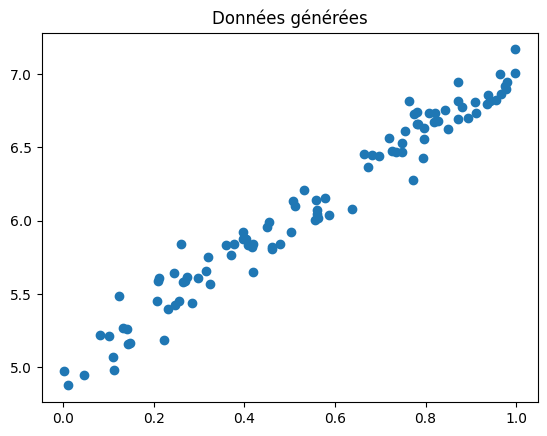

In [9]:
#Visualisation des données
plt.scatter(x, y)
plt.title('Données générées')
plt.show()

In [10]:
indices = np.arange(n_samples)
np.random.shuffle(indices)
train_size = int(0.8 * n_samples)
train_indices, test_indices = indices[:train_size], indices[train_size:]
x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]


In [11]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(torch.tensor(x_train, dtype=torch.float32))
    loss = criterion(predictions, torch.tensor(y_train, dtype=torch.float32))
    loss.backward()
    optimizer.step()


In [12]:
#Créer un jeu de donnée corrompu

alpha = 0.2
n_poisoned = int(alpha * n_samples)
poisoned_indices = np.random.choice(n_samples, n_poisoned, replace=False)
y_poisoned = y.copy()
y_poisoned[poisoned_indices] += np.random.normal(0, 1.0, (n_poisoned, 1))


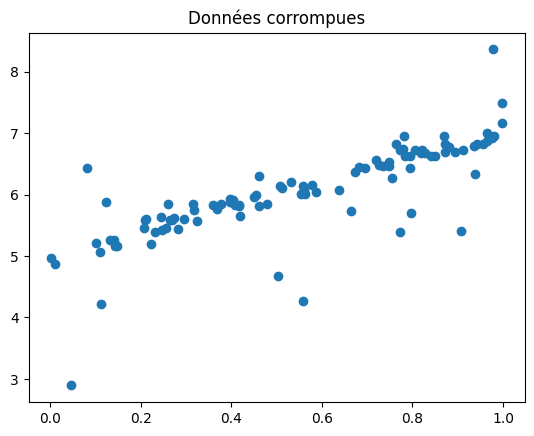

In [13]:
#Visualiser les données corrompues
plt.scatter(x, y_poisoned)
plt.title('Données corrompues')
plt.show()


In [14]:
#Entraîner un modèle sur les données corrompues

x_poisoned, y_poisoned = torch.tensor(x, dtype=torch.float32), torch.tensor(y_poisoned, dtype=torch.float32)
model_corrupted = nn.Linear(1, 1)
optimizer_corrupted = optim.SGD(model_corrupted.parameters(), lr=0.1)

for epoch in range(n_epochs):
    model_corrupted.train()
    optimizer_corrupted.zero_grad()
    predictions_corrupted = model_corrupted(x_poisoned)
    loss_corrupted = criterion(predictions_corrupted, y_poisoned)
    loss_corrupted.backward()
    optimizer_corrupted.step()


In [ ]:
#Évaluer la précision
model_corrupted.eval()
with torch.no_grad():
    test_predictions_corrupted = model_corrupted(x_test)
    test_loss_corrupted = criterion(test_predictions_corrupted, y_test)
    print(f'Test Loss with corrupted data: {test_loss_corrupted.item()}')
